In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf

# %matplotlib notebook

rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

ShearJefferyProblem: run 10000 loops using 1.225522


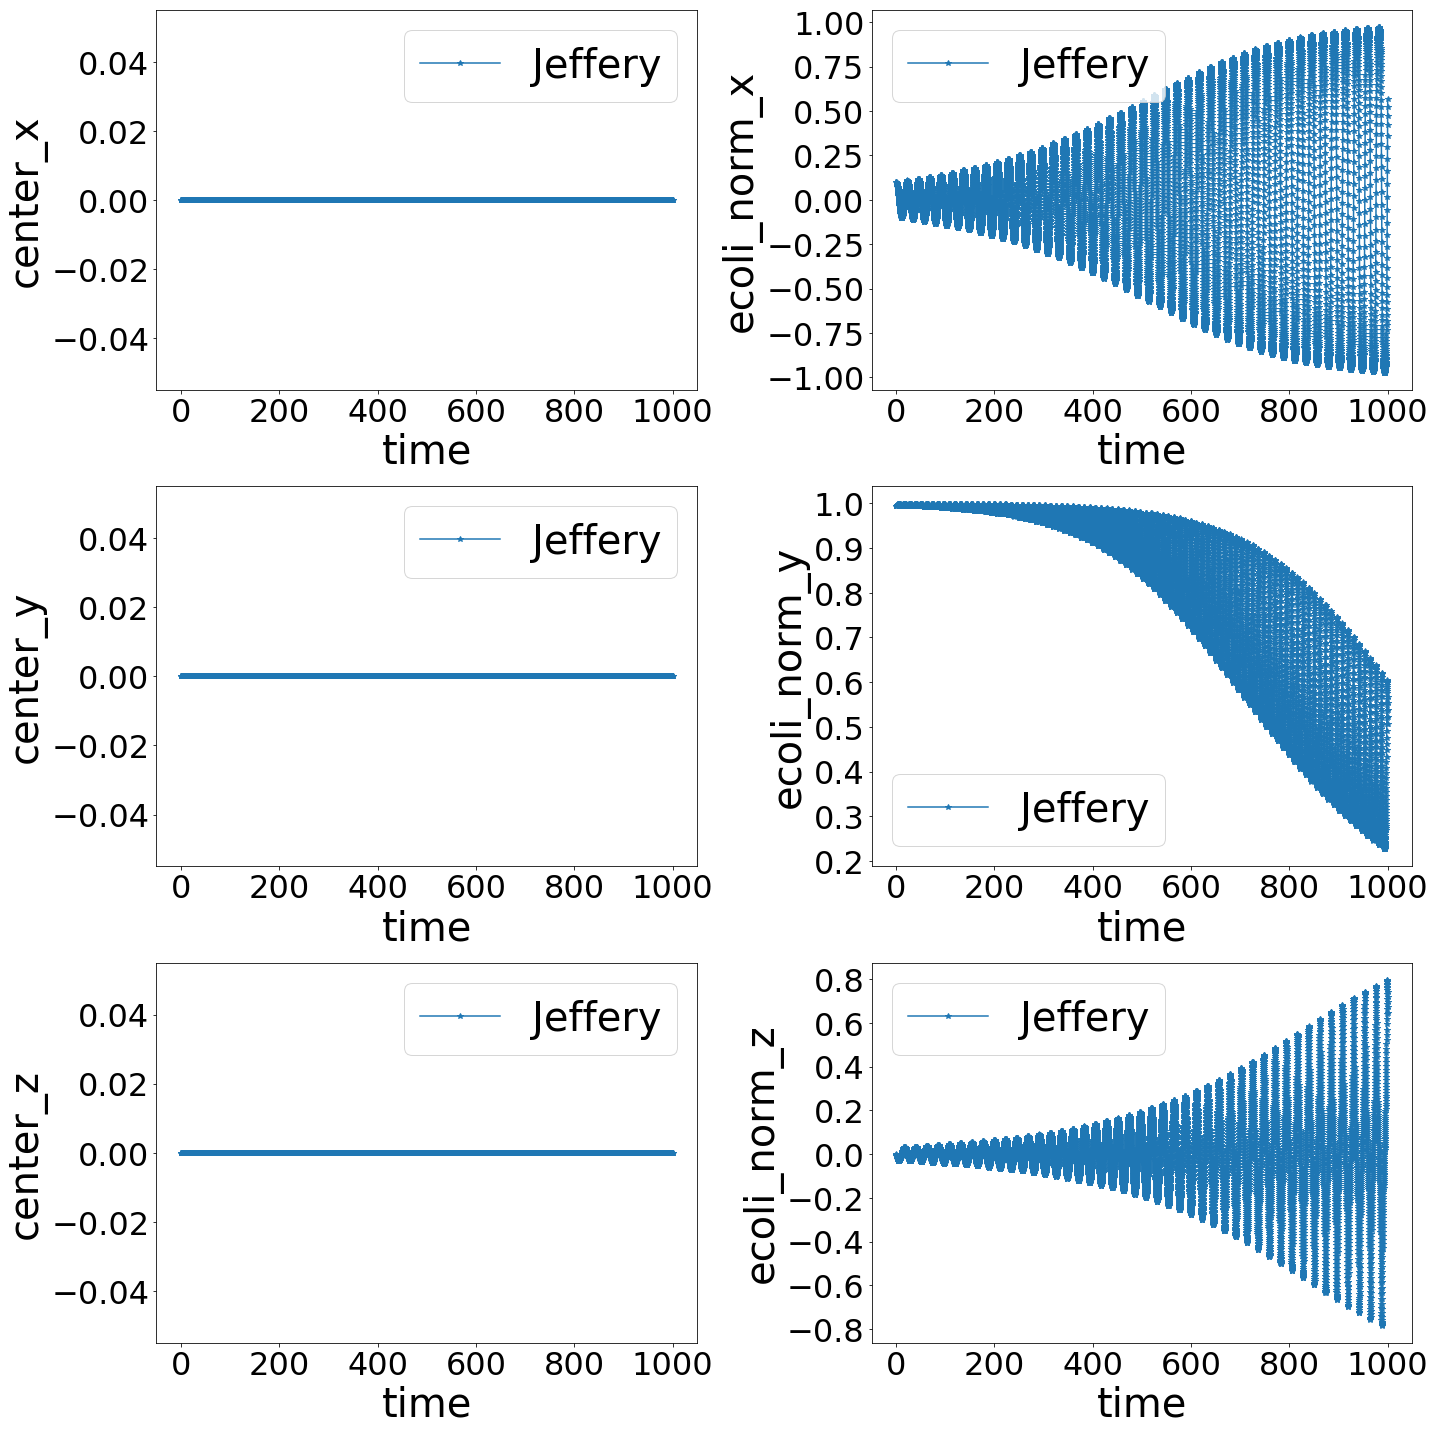

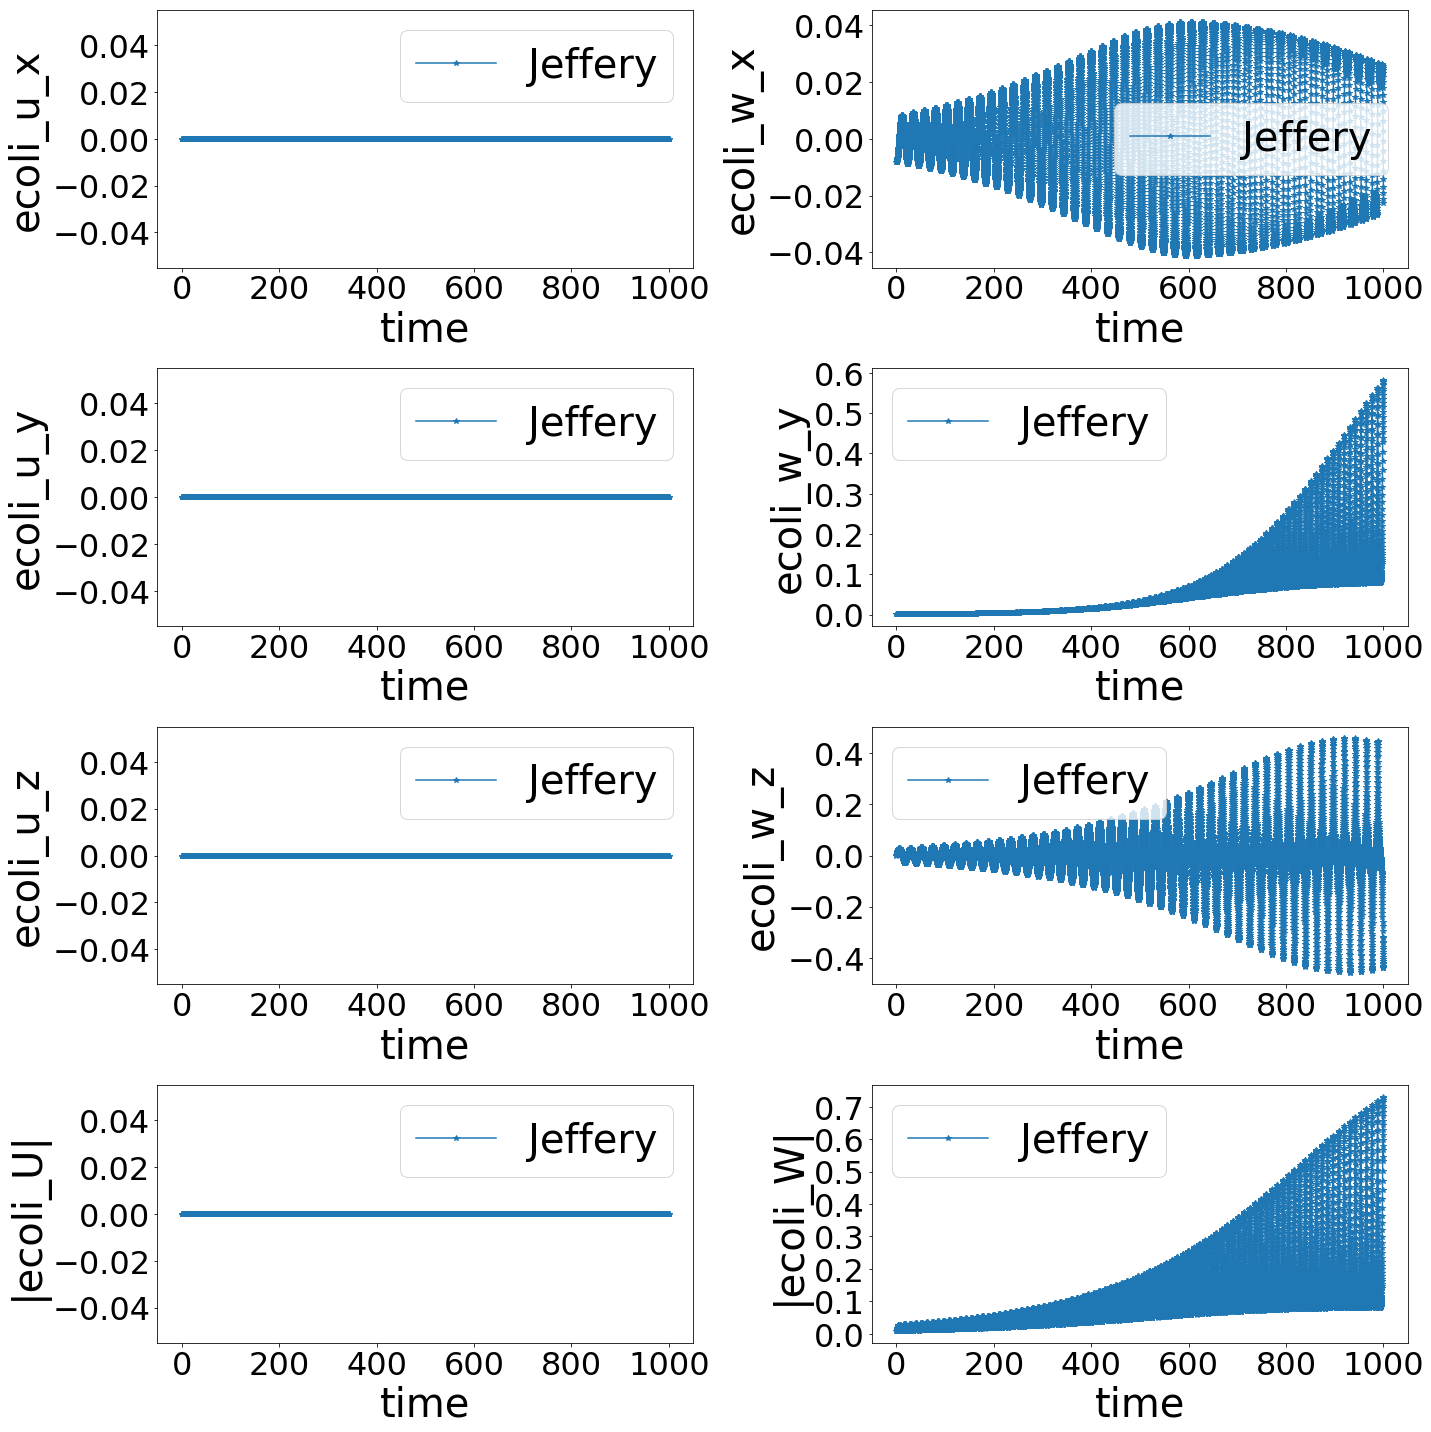

In [13]:
%matplotlib inline

importlib.reload(jm)
fileHandle = 'ShearJefferyProblem'
talpha = 1 / 0.3
tcenter = np.array((0, 0, 0))
ellipse_velocity = 0
# tnorm = np.random.sample(3)
tnorm = np.array((0.1, 1, 0))
lateral_norm = np.array((1, 0, 0))
planeShearRate = (1, 0, 0)
eval_dt = 0.1
max_iter = 10000
problem = jm.ShearJefferyProblem(planeShearRate=planeShearRate)

ellipse_kwargs = {'name':     '1111',
                  'center':   tcenter,
                  'norm':     tnorm / np.linalg.norm(tnorm),
                  'lateral_norm':  lateral_norm / np.linalg.norm(lateral_norm),
                  'speed': ellipse_velocity,
                  'rot_speed': 0,
                  'lbd':      (talpha ** 2 - 1) / (talpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
ellipse_obj.set_update_para(update_order=1)
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)

fig, [(ax0, ax3), (ax1, ax4), (ax2, ax5)] = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.patch.set_facecolor('white')
ax0.plot(jeffery_t, center_hist[:, 0], '-*', label='Jeffery')
ax1.plot(jeffery_t, center_hist[:, 1], '-*', label='Jeffery')
ax2.plot(jeffery_t, center_hist[:, 2], '-*', label='Jeffery')
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('center_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()
ax3.plot(jeffery_t, norm_hist[:, 0], '-*', label='Jeffery')
ax4.plot(jeffery_t, norm_hist[:, 1], '-*', label='Jeffery')
ax5.plot(jeffery_t, norm_hist[:, 2], '-*', label='Jeffery')
for axi, axyi in zip((ax3, ax4, ax5, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('ecoli_norm_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()

fig, [(ax0, ax3), (ax1, ax4), (ax2, ax5), (ax6, ax7)] = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
fig.patch.set_facecolor('white')
ax0.plot(jeffery_t, U_hist[:, 0], '-*', label='Jeffery')
ax1.plot(jeffery_t, U_hist[:, 1], '-*', label='Jeffery')
ax2.plot(jeffery_t, U_hist[:, 2], '-*', label='Jeffery')
ax3.plot(jeffery_t, U_hist[:, 3], '-*', label='Jeffery')
ax4.plot(jeffery_t, U_hist[:, 4], '-*', label='Jeffery')
ax5.plot(jeffery_t, U_hist[:, 5], '-*', label='Jeffery')
ax6.plot(jeffery_t, np.linalg.norm(U_hist[:, :3], axis=1), '-*', label='Jeffery')
ax7.plot(jeffery_t, np.linalg.norm(U_hist[:, 3:], axis=1), '-*', label='Jeffery')
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('ecoli_u_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
for axi, axyi in zip((ax3, ax4, ax5, ), ('x', 'y', 'z')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel('ecoli_w_%s' % axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
for axi, axyi in zip((ax6, ax7), ('|ecoli_U|', '|ecoli_W|')):
    plt.sca(axi)
    axi.set_xlabel('time', size=fontsize)
    axi.set_ylabel(axyi, size=fontsize)
    axi.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
plt.tight_layout()



ini norm= [-0.40802 -0.30495 -0.45912] ellipse_speed= 1
ShearJefferyProblem: run 1000 loops using 0.163660
ShearTableProblem: run 1000 loops using 0.800029


/home/zhangji/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


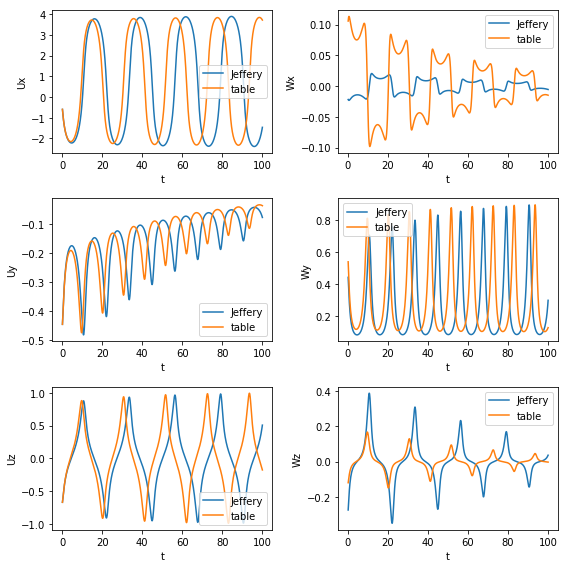

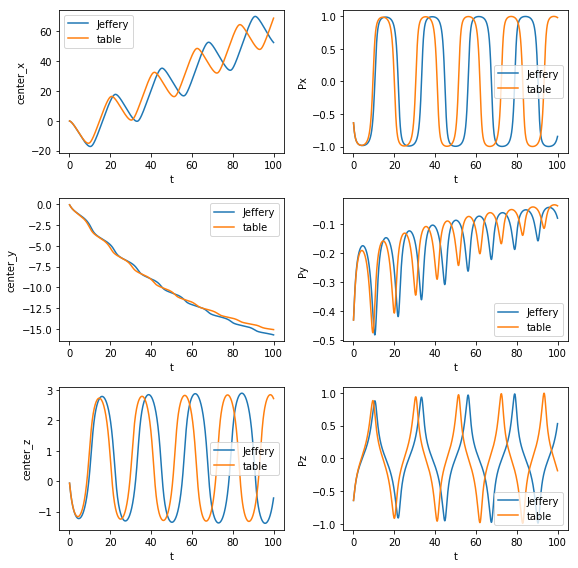

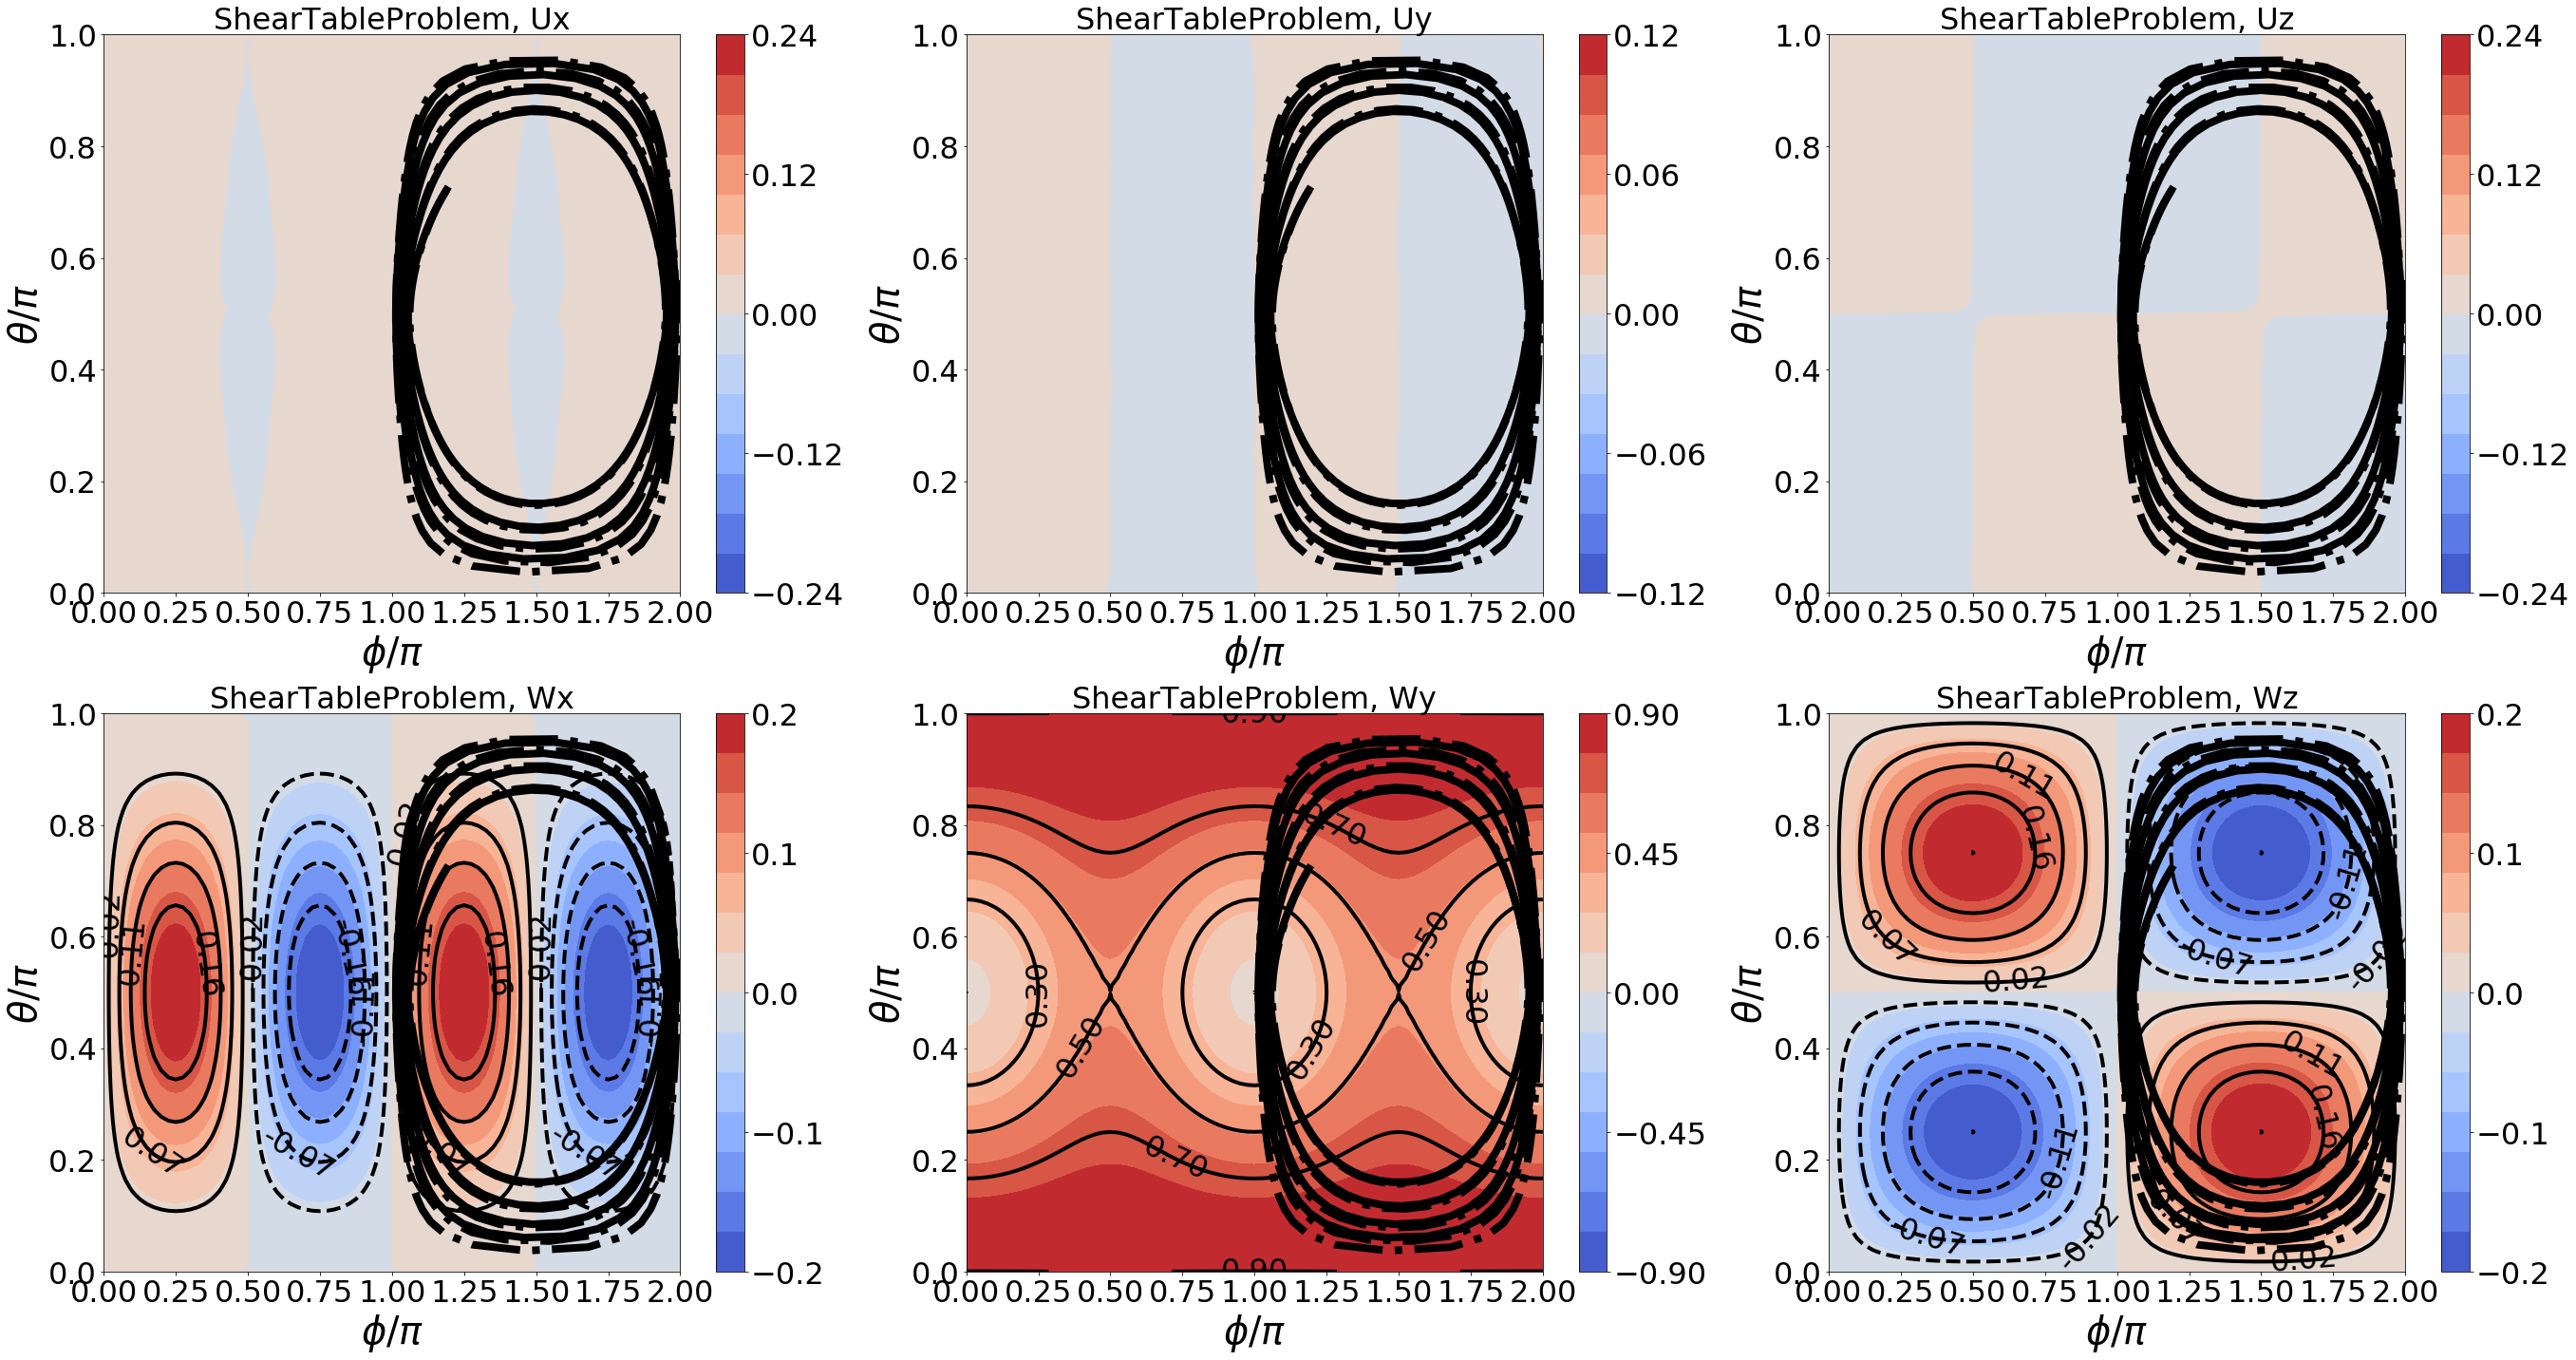

In [15]:
# ellipes case. Jeffery vs Table. 

importlib.reload(jm)
eval_dt = 0.1
max_iter = 1000
update_order = 3
ellipse_speed = 1
planeShearRate = np.array((1, 0, 0))
talpha = 1 / 0.3
# tnorm = np.array((1, 0, 0))
tnorm = np.random.sample(3) - np.ones(3) * 0.5
lateral_norm = np.array((0, 1, 0))
tcenter = np.array((0, 0, 0))
print('ini norm=', tnorm, 'ellipse_speed=', ellipse_speed)

# Jeffery result
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'rot_speed':    0,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1)}
fileHandle = 'ShearJefferyProblem'
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearJefferyProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
Jeffery_X = np.vstack(ellipse_obj.center_hist)
Jeffery_U = np.vstack(ellipse_obj.U_hist)
Jeffery_P = np.vstack(ellipse_obj.norm_hist)
Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
Jeffery_theta = np.arccos(Jeffery_P[:, 2] / np.linalg.norm(Jeffery_P, axis=1))
t_phi = np.arctan2(Jeffery_P[:, 1], Jeffery_P[:, 0])
Jeffery_phi = np.hstack([t1 + 2 * np.pi if t1 < 0 else t1 for t1 in t_phi])
# Jeffery_phi = Jeffery_P[:, 1] / Jeffery_P[:, 0]
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

# Table result
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                  'table_name':   'ellipse_alpha3', }
fileHandle = 'ShearTableProblem'
ellipse_obj = jm.TableObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
Table_X = np.vstack(ellipse_obj.center_hist)
Table_U = np.vstack(ellipse_obj.U_hist)
Table_P = np.vstack(ellipse_obj.norm_hist)
Table_t = np.arange(max_iter) * eval_dt + eval_dt
Table_theta = np.arccos(Table_P[:, 2] / np.linalg.norm(Table_P, axis=1))
t_phi = np.arctan2(Table_P[:, 1], Table_P[:, 0])
Table_phi = np.hstack([t1 + 2 * np.pi if t1 < 0 else t1 for t1 in t_phi])
# Table_phi = Table_P[:, 1] / Table_P[:, 0]
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
ax0.plot(Jeffery_t, Jeffery_U[:, 0], label='Jeffery')
ax1.plot(Jeffery_t, Jeffery_U[:, 1], label='Jeffery')
ax2.plot(Jeffery_t, Jeffery_U[:, 2], label='Jeffery')
ax3.plot(Jeffery_t, Jeffery_U[:, 3], label='Jeffery')
ax4.plot(Jeffery_t, Jeffery_U[:, 4], label='Jeffery')
ax5.plot(Jeffery_t, Jeffery_U[:, 5], label='Jeffery')
ax0.plot(Table_t, Table_U[:, 0], label='table')
ax1.plot(Table_t, Table_U[:, 1], label='table')
ax2.plot(Table_t, Table_U[:, 2], label='table')
ax3.plot(Table_t, Table_U[:, 3], label='table')
ax4.plot(Table_t, Table_U[:, 4], label='table')
ax5.plot(Table_t, Table_U[:, 5], label='table')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5, ), ('Ux', 'Uy', 'Uz','Wx', 'Wy', 'Wz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
ax0.plot(Jeffery_t, Jeffery_X[:, 0], label='Jeffery')
ax1.plot(Jeffery_t, Jeffery_X[:, 1], label='Jeffery')
ax2.plot(Jeffery_t, Jeffery_X[:, 2], label='Jeffery')
ax0.plot(Table_t, Table_X[:, 0], label='table')
ax1.plot(Table_t, Table_X[:, 1], label='table')
ax2.plot(Table_t, Table_X[:, 2], label='table')
ax3.plot(Jeffery_t, Jeffery_P[:, 0], label='Jeffery')
ax4.plot(Jeffery_t, Jeffery_P[:, 1], label='Jeffery')
ax5.plot(Jeffery_t, Jeffery_P[:, 2], label='Jeffery')
ax3.plot(Table_t, Table_P[:, 0], label='table')
ax4.plot(Table_t, Table_P[:, 1], label='table')
ax5.plot(Table_t, Table_P[:, 2], label='table')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5), ('center_x', 'center_y', 'center_z', 'Px', 'Py', 'Pz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

# fig = plt.figure(figsize=(8, 8))
# fig.patch.set_facecolor('white')
# ax0 = fig.add_subplot(3, 2, 1)
# ax1 = fig.add_subplot(3, 2, 3)
# ax2 = fig.add_subplot(3, 2, 5)
# ax3 = fig.add_subplot(3, 2, 2)
# ax4 = fig.add_subplot(3, 2, 4)
# ax5 = fig.add_subplot(3, 2, 6)
# Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
# ax0.plot(Jeffery_t, Jeffery_P[:, 0], label='Jeffery')
# ax1.plot(Jeffery_t, Jeffery_P[:, 1], label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_P[:, 2], label='Jeffery')
# ax0.plot(Table_t, Table_P[:, 0], label='table')
# ax1.plot(Table_t, Table_P[:, 1], label='table')
# ax2.plot(Table_t, Table_P[:, 2], label='table')
# ax3.plot(Jeffery_t, Jeffery_theta / np.pi, label='Jeffery')
# ax4.plot(Jeffery_t, Jeffery_phi / np.pi, label='Jeffery')
# ax3.plot(Table_t, Table_theta / np.pi, label='table')
# ax4.plot(Table_t, Table_phi / np.pi, label='table')
# for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ), ('Px', 'Py', 'Pz', '$\\theta / \pi$', '$\\phi / \pi$')):
#     axi.set_xlabel('t')
#     axi.set_ylabel('%s' % axyi)
#     axi.legend()
# plt.tight_layout()


# Phase map
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                  'table_name':   'ellipse_alpha3', }
fileHandle = 'ShearTableProblem'
ellipse_obj = jm.TableObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)
intp_n_theta, intp_n_phi = 81, 81
txx, tyy = np.meshgrid(np.linspace(0, np.pi, intp_n_theta), np.linspace(0, 2 * np.pi, intp_n_phi))
tU = []
for i0, (tx1, ty1) in enumerate(zip(txx.flatten(), tyy.flatten())):
    tU.append(ellipse_obj.intp_U_fun(tx1, ty1, 0))
tU = np.vstack(tU)

fig = plt.figure(figsize=(38, 20))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(2, 3, 1)
ax1 = fig.add_subplot(2, 3, 2)
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)
for axi, ui, zlabeli, (vmin, vmax) in zip((ax0, ax1, ax2, ax3, ax4, ax5), 
                                            tU.T, 
                                            ('Ux', 'Uy', 'Uz', 'Wx', 'Wy', 'Wz'),
                                            ((-0.24, 0.24), (-0.12, 0.12), (-0.24, 0.24), 
                                             (-0.2, 0.2), (-0.9, 0.9), (-0.2, 0.2))):
    plt.sca(axi)
    ticks = np.linspace(vmin, vmax, 15)
    im = axi.contourf(tyy / np.pi, 
                      txx / np.pi, 
                      ui.reshape((intp_n_theta, intp_n_phi)), ticks, 
                      cmap=cm.coolwarm)
    ticks = np.linspace(vmin, vmax, 5)
    fig.colorbar(im, ticks=ticks, ax=axi).ax.tick_params(labelsize=fontsize*0.8)
    ticks = np.linspace(vmin, vmax, 10)
    im = axi.contour(tyy / np.pi, 
                    txx / np.pi, 
                    ui.reshape((intp_n_theta, intp_n_phi)), ticks, 
                    linewidths=fontsize*0.1, colors='k')
    plt.clabel(im, fmt='%4.2f', colors='k', fontsize=fontsize*0.8, inline=0, rightside_up=1)
    axi.set_xlabel('$\\phi / \pi$', size=fontsize)
    axi.set_ylabel('$\\theta / \pi$', size=fontsize)
    axi.set_title('%s, %s' % (fileHandle, zlabeli), size=fontsize*0.8)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)

    
for axi in (ax0, ax1, ax2, ax3, ax4, ax5): 
    axi.plot(Jeffery_phi / np.pi, Jeffery_theta / np.pi, '-k', label='Jeffery', 
             markevery=Jeffery_phi.size // 30, ms = fontsize, linewidth=fontsize*0.2)
for axi in (ax0, ax1, ax2, ax3, ax4, ax5): 
    axi.plot(Table_phi / np.pi, Table_theta / np.pi, '-.k', label='Table', 
             markevery=Jeffery_phi.size // 30, ms = fontsize, linewidth=fontsize*0.2)
plt.tight_layout()


In [3]:
# Ellipes Table result at given P

importlib.reload(jm)
eval_dt = 0.1
max_iter = 300
update_order = 3
ellipse_speed = 0
planeShearRate = np.array((1, 0, 0))
talpha = 1 / 0.3
tnorm = np.array((1, 0, 0))
lateral_norm = np.array((0, 1, 0))
tcenter = np.array((0, 0, 0))

# Table result
ellipse_kwargs = {'name':         'ellipse',
                  'center':       tcenter,
                  'norm':         tnorm / np.linalg.norm(tnorm),
                  'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                  'speed':        ellipse_speed,
                  'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                  'table_name':   'ellipse_alpha3', }
fileHandle = 'ShearTableProblem'
ellipse_obj = jm.TableObj(**ellipse_kwargs)
ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(ellipse_obj)

# dX, dP, dP2, omega = ellipse_obj.get_velocity_at(tcenter, tnorm, lateral_norm, 0, 0)
# print(dX)
tU = ellipse_obj.intp_U_fun(np.pi / 2, 0, 0)
print()
print(tU)



[  6.36275e-05   3.56492e-11   5.61622e-11   5.15721e-09   9.99640e-02   1.78049e-07]


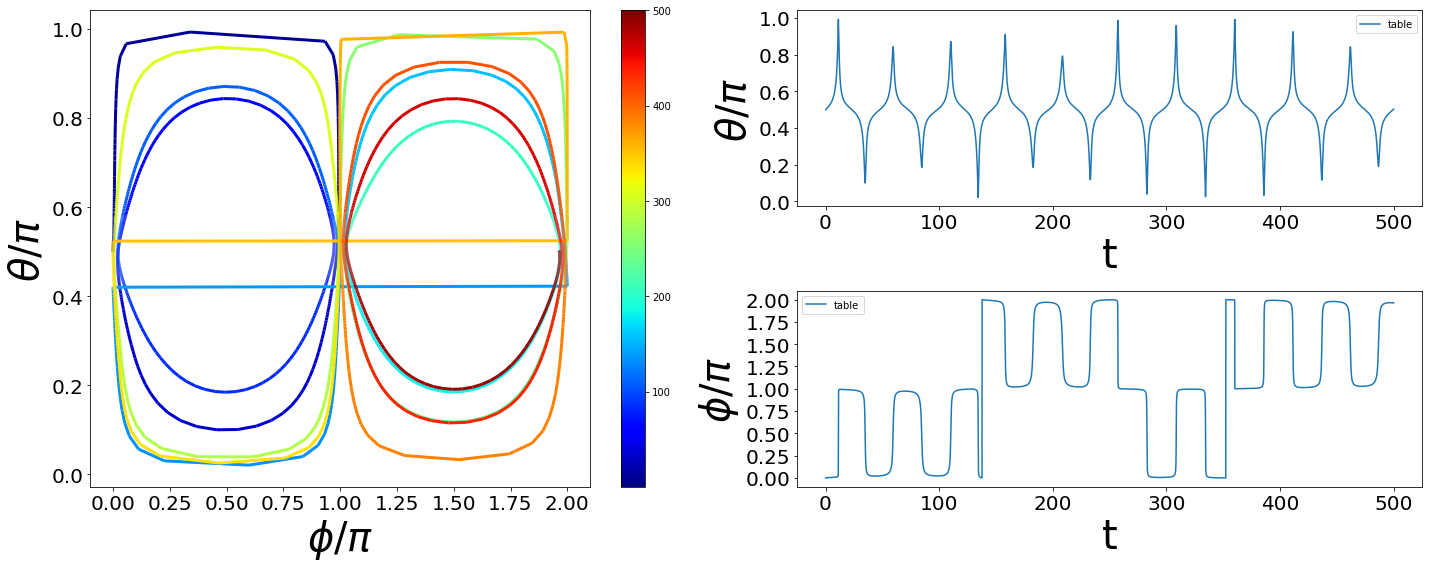

In [41]:
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('white')
ax0 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
ax1 = plt.subplot2grid((2, 2), (0, 1), )
ax2 = plt.subplot2grid((2, 2), (1, 1), )
norm=plt.Normalize(Table_t.min(), Table_t.max())
cmap=plt.get_cmap('jet')
ax0.plot(Table_phi / np.pi, Table_theta / np.pi, ' ')
# ax0.plot(Table_phi / np.pi, Table_theta / np.pi, '*', ms=fontsize*0.5)
lc = spf.colorline(Table_phi / np.pi, Table_theta / np.pi, Table_t, 
                   ax=ax0, cmap=cmap, norm=norm, linewidth=3)
clb = fig.colorbar(lc, ax=ax0, orientation="vertical")
ax0.set_xlabel('$\\phi / \pi$', size=fontsize)
ax0.set_ylabel('$\\theta / \pi$', size=fontsize)
plt.sca(ax0)
plt.xticks(fontsize=fontsize*0.5)
plt.yticks(fontsize=fontsize*0.5)
# ax1.plot(Jeffery_t, Jeffery_theta / np.pi, label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_phi / np.pi, label='Jeffery')
ax1.plot(Table_t, Table_theta / np.pi, label='table')
ax2.plot(Table_t, Table_phi / np.pi, label='table')
for axi, axyi in zip((ax1, ax2, ), ('$\\theta / \pi$', '$\\phi / \pi$')):
    plt.sca(axi)
    axi.set_xlabel('t', size=fontsize)
    axi.set_ylabel('%s' % axyi, size=fontsize)
    axi.legend()
    plt.xticks(fontsize=fontsize*0.5)
    plt.yticks(fontsize=fontsize*0.5)
plt.tight_layout()

ini norm= [ 0.1  1.   0. ] helix_speed= 0
ShearTableProblem: run 200000 loops using 256.331002


/home/zhangji/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


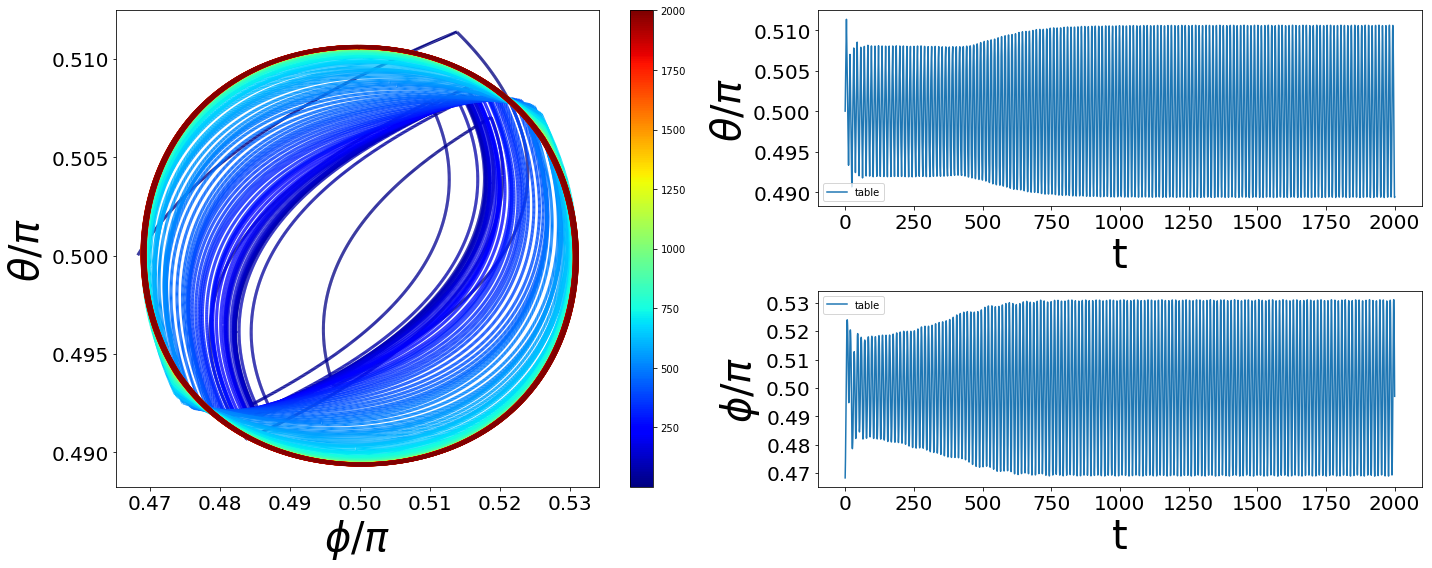

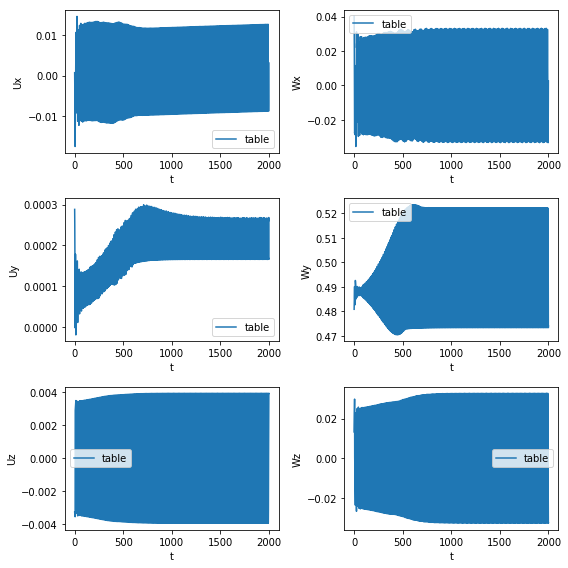

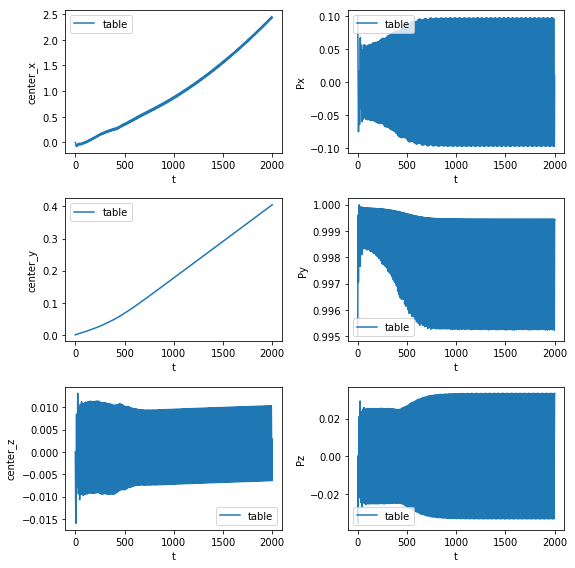

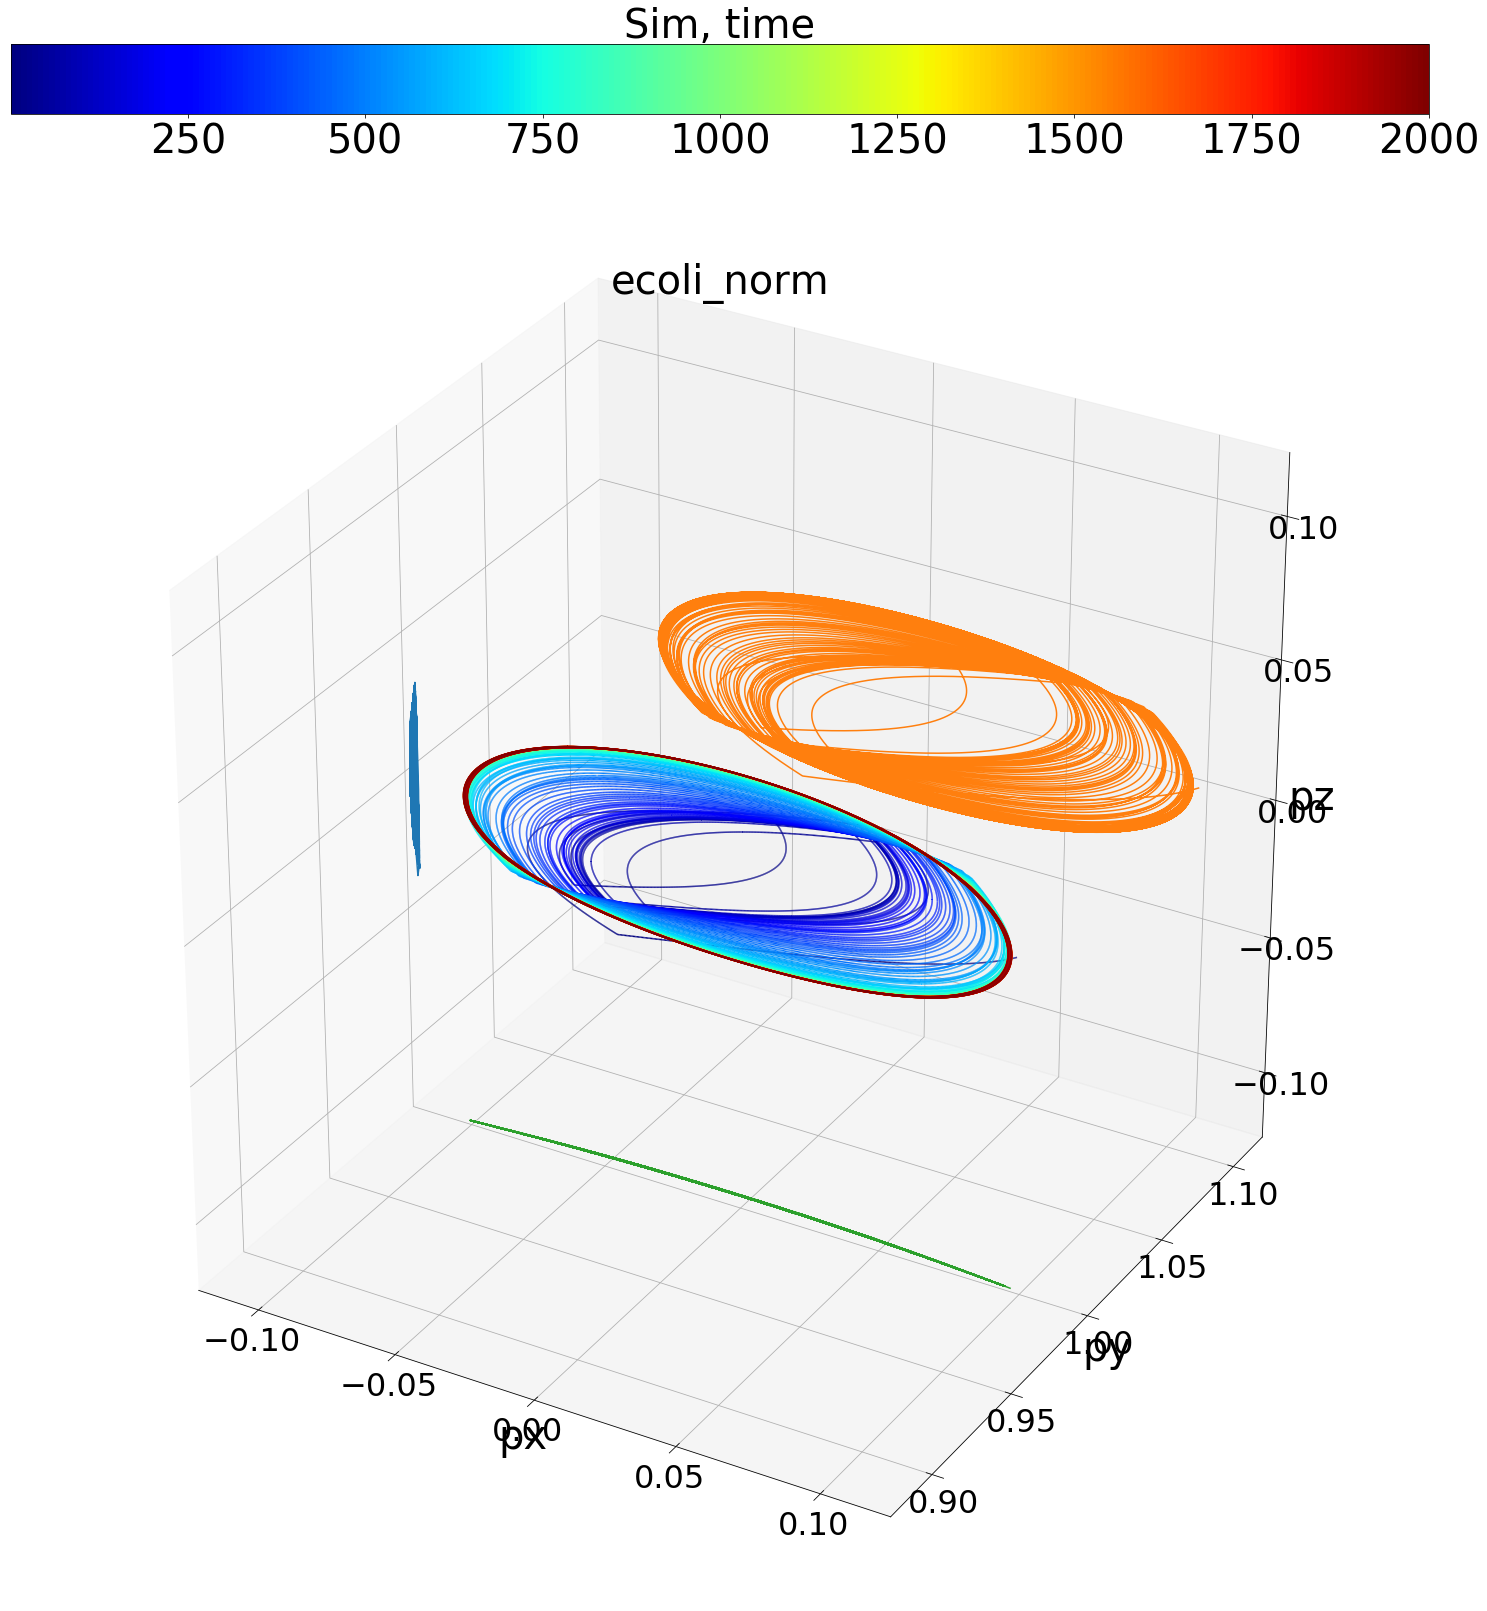

In [56]:
# Helix case. Table. 

importlib.reload(jm)
eval_dt = 0.01
max_iter = 200000
update_order = 3
helix_speed = 0
planeShearRate = np.array((1, 0, 0))
tnorm = np.array((0.1, 1, 0))
# tnorm = np.random.sample(3) - np.ones(3) * 0.5
lateral_norm = np.array((0, 1, 0))
tcenter = np.array((0, 0, 0))
print('ini norm=', tnorm, 'helix_speed=', helix_speed)

# Table result
helix_kwargs = {'name':         'helix',
                'center':       tcenter,
                'norm':         tnorm / np.linalg.norm(tnorm),
                'lateral_norm': lateral_norm / np.linalg.norm(lateral_norm),
                'speed':        helix_speed,
                'lbd':          (talpha ** 2 - 1) / (talpha ** 2 + 1), 
                'table_name':   'hlxB01_tau1a', }
fileHandle = 'ShearTableProblem'
helix_obj = jm.TableObj(**helix_kwargs)
helix_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_order=update_order)
problem = jm.ShearTableProblem(name=fileHandle, planeShearRate=planeShearRate)
problem.add_obj(helix_obj)
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
Table_X = np.vstack(helix_obj.center_hist)
Table_U = np.vstack(helix_obj.U_hist)
Table_P = np.vstack(helix_obj.norm_hist)
Table_t = np.arange(max_iter) * eval_dt + eval_dt
Table_theta = np.arccos(Table_P[:, 2] / np.linalg.norm(Table_P, axis=1))
t_phi = np.arctan2(Table_P[:, 1], Table_P[:, 0])
Table_phi = np.hstack([t1 + 2 * np.pi if t1 < 0 else t1 for t1 in t_phi])
# Table_phi = Table_P[:, 1] / Table_P[:, 0]
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('white')
ax0 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
ax1 = plt.subplot2grid((2, 2), (0, 1), )
ax2 = plt.subplot2grid((2, 2), (1, 1), )
norm=plt.Normalize(Table_t.min(), Table_t.max())
cmap=plt.get_cmap('jet')
ax0.plot(Table_phi / np.pi, Table_theta / np.pi, ' ')
# ax0.plot(Table_phi / np.pi, Table_theta / np.pi, '*', ms=fontsize*0.5)
lc = spf.colorline(Table_phi / np.pi, Table_theta / np.pi, Table_t, 
                   ax=ax0, cmap=cmap, norm=norm, linewidth=3)
clb = fig.colorbar(lc, ax=ax0, orientation="vertical")
ax0.set_xlabel('$\\phi / \pi$', size=fontsize)
ax0.set_ylabel('$\\theta / \pi$', size=fontsize)
plt.sca(ax0)
plt.xticks(fontsize=fontsize*0.5)
plt.yticks(fontsize=fontsize*0.5)
# ax1.plot(Jeffery_t, Jeffery_theta / np.pi, label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_phi / np.pi, label='Jeffery')
ax1.plot(Table_t, Table_theta / np.pi, label='table')
ax2.plot(Table_t, Table_phi / np.pi, label='table')
for axi, axyi in zip((ax1, ax2, ), ('$\\theta / \pi$', '$\\phi / \pi$')):
    plt.sca(axi)
    axi.set_xlabel('t', size=fontsize)
    axi.set_ylabel('%s' % axyi, size=fontsize)
    axi.legend()
    plt.xticks(fontsize=fontsize*0.5)
    plt.yticks(fontsize=fontsize*0.5)
plt.tight_layout()

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
# ax0.plot(Jeffery_t, Jeffery_U[:, 0], label='Jeffery')
# ax1.plot(Jeffery_t, Jeffery_U[:, 1], label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_U[:, 2], label='Jeffery')
# ax3.plot(Jeffery_t, Jeffery_U[:, 3], label='Jeffery')
# ax4.plot(Jeffery_t, Jeffery_U[:, 4], label='Jeffery')
# ax5.plot(Jeffery_t, Jeffery_U[:, 5], label='Jeffery')
ax0.plot(Table_t, Table_U[:, 0], label='table')
ax1.plot(Table_t, Table_U[:, 1], label='table')
ax2.plot(Table_t, Table_U[:, 2], label='table')
ax3.plot(Table_t, Table_U[:, 3], label='table')
ax4.plot(Table_t, Table_U[:, 4], label='table')
ax5.plot(Table_t, Table_U[:, 5], label='table')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5, ), ('Ux', 'Uy', 'Uz','Wx', 'Wy', 'Wz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 3)
ax2 = fig.add_subplot(3, 2, 5)
ax3 = fig.add_subplot(3, 2, 2)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 6)
Jeffery_t = np.arange(max_iter) * eval_dt + eval_dt
# ax0.plot(Jeffery_t, Jeffery_X[:, 0], label='Jeffery')
# ax1.plot(Jeffery_t, Jeffery_X[:, 1], label='Jeffery')
# ax2.plot(Jeffery_t, Jeffery_X[:, 2], label='Jeffery')
# ax3.plot(Jeffery_t, Jeffery_P[:, 0], label='Jeffery')
# ax4.plot(Jeffery_t, Jeffery_P[:, 1], label='Jeffery')
# ax5.plot(Jeffery_t, Jeffery_P[:, 2], label='Jeffery')
ax0.plot(Table_t, Table_X[:, 0], label='table')
ax1.plot(Table_t, Table_X[:, 1], label='table')
ax2.plot(Table_t, Table_X[:, 2], label='table')
ax3.plot(Table_t, Table_P[:, 0], label='table')
ax4.plot(Table_t, Table_P[:, 1], label='table')
ax5.plot(Table_t, Table_P[:, 2], label='table')
for axi, axyi in zip((ax0, ax1, ax2, ax3, ax4, ax5), ('center_x', 'center_y', 'center_z', 'Px', 'Py', 'Pz')):
    axi.set_xlabel('t')
    axi.set_ylabel('%s' % axyi)
    axi.legend()
plt.tight_layout()

fig = plt.figure(figsize=(20, 20))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
ax0.set_title('ecoli_norm', size=fontsize)
cax0 = inset_axes(ax0, width="100%", height="5%", bbox_to_anchor=(0, 0.1, 1, 1),
               loc=1, bbox_transform=ax0.transAxes, borderpad=0,)
norm=plt.Normalize(Table_t.min(), Table_t.max())
cmap=plt.get_cmap('jet')
# Create the 3D-line collection object
points = Table_P.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = Line3DCollection(segments, cmap=cmap, norm=norm)
lc.set_array(Table_t) 
ax0.add_collection3d(lc, zs=points[:, :, 2].flatten(), zdir='z')
ax0.set_xlim(points[:, :, 0].min(), points[:, :, 0].max())
ax0.set_ylim(points[:, :, 1].min(), points[:, :, 1].max())
ax0.set_zlim(points[:, :, 2].min(), points[:, :, 2].max())
spf.set_axes_equal(ax0)
ax0.plot(np.ones_like(points[:, :, 0].flatten())*ax0.get_xlim()[0], points[:, :, 1].flatten(), points[:, :, 2].flatten())
ax0.plot(points[:, :, 0].flatten(), np.ones_like(points[:, :, 1].flatten())*ax0.get_ylim()[1], points[:, :, 2].flatten())
ax0.plot(points[:, :, 0].flatten(), points[:, :, 1].flatten(), np.ones_like(points[:, :, 2].flatten())*ax0.get_zlim()[0])
clb = fig.colorbar(lc, cax=cax0, orientation="horizontal")
clb.ax.tick_params(labelsize=fontsize)
clb.ax.set_title('Sim, time', size=fontsize)
plt.sca(ax0)
ax0.set_xlabel('px', size=fontsize)
ax0.set_ylabel('py', size=fontsize)
ax0.set_zlabel('pz', size=fontsize)
plt.xticks(fontsize=fontsize*0.8)
plt.yticks(fontsize=fontsize*0.8)
for t in ax0.zaxis.get_major_ticks(): t.label.set_fontsize(fontsize*0.8)
for spine in ax0.spines.values():
    spine.set_visible(False)
plt.tight_layout()


/home/zhangji/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


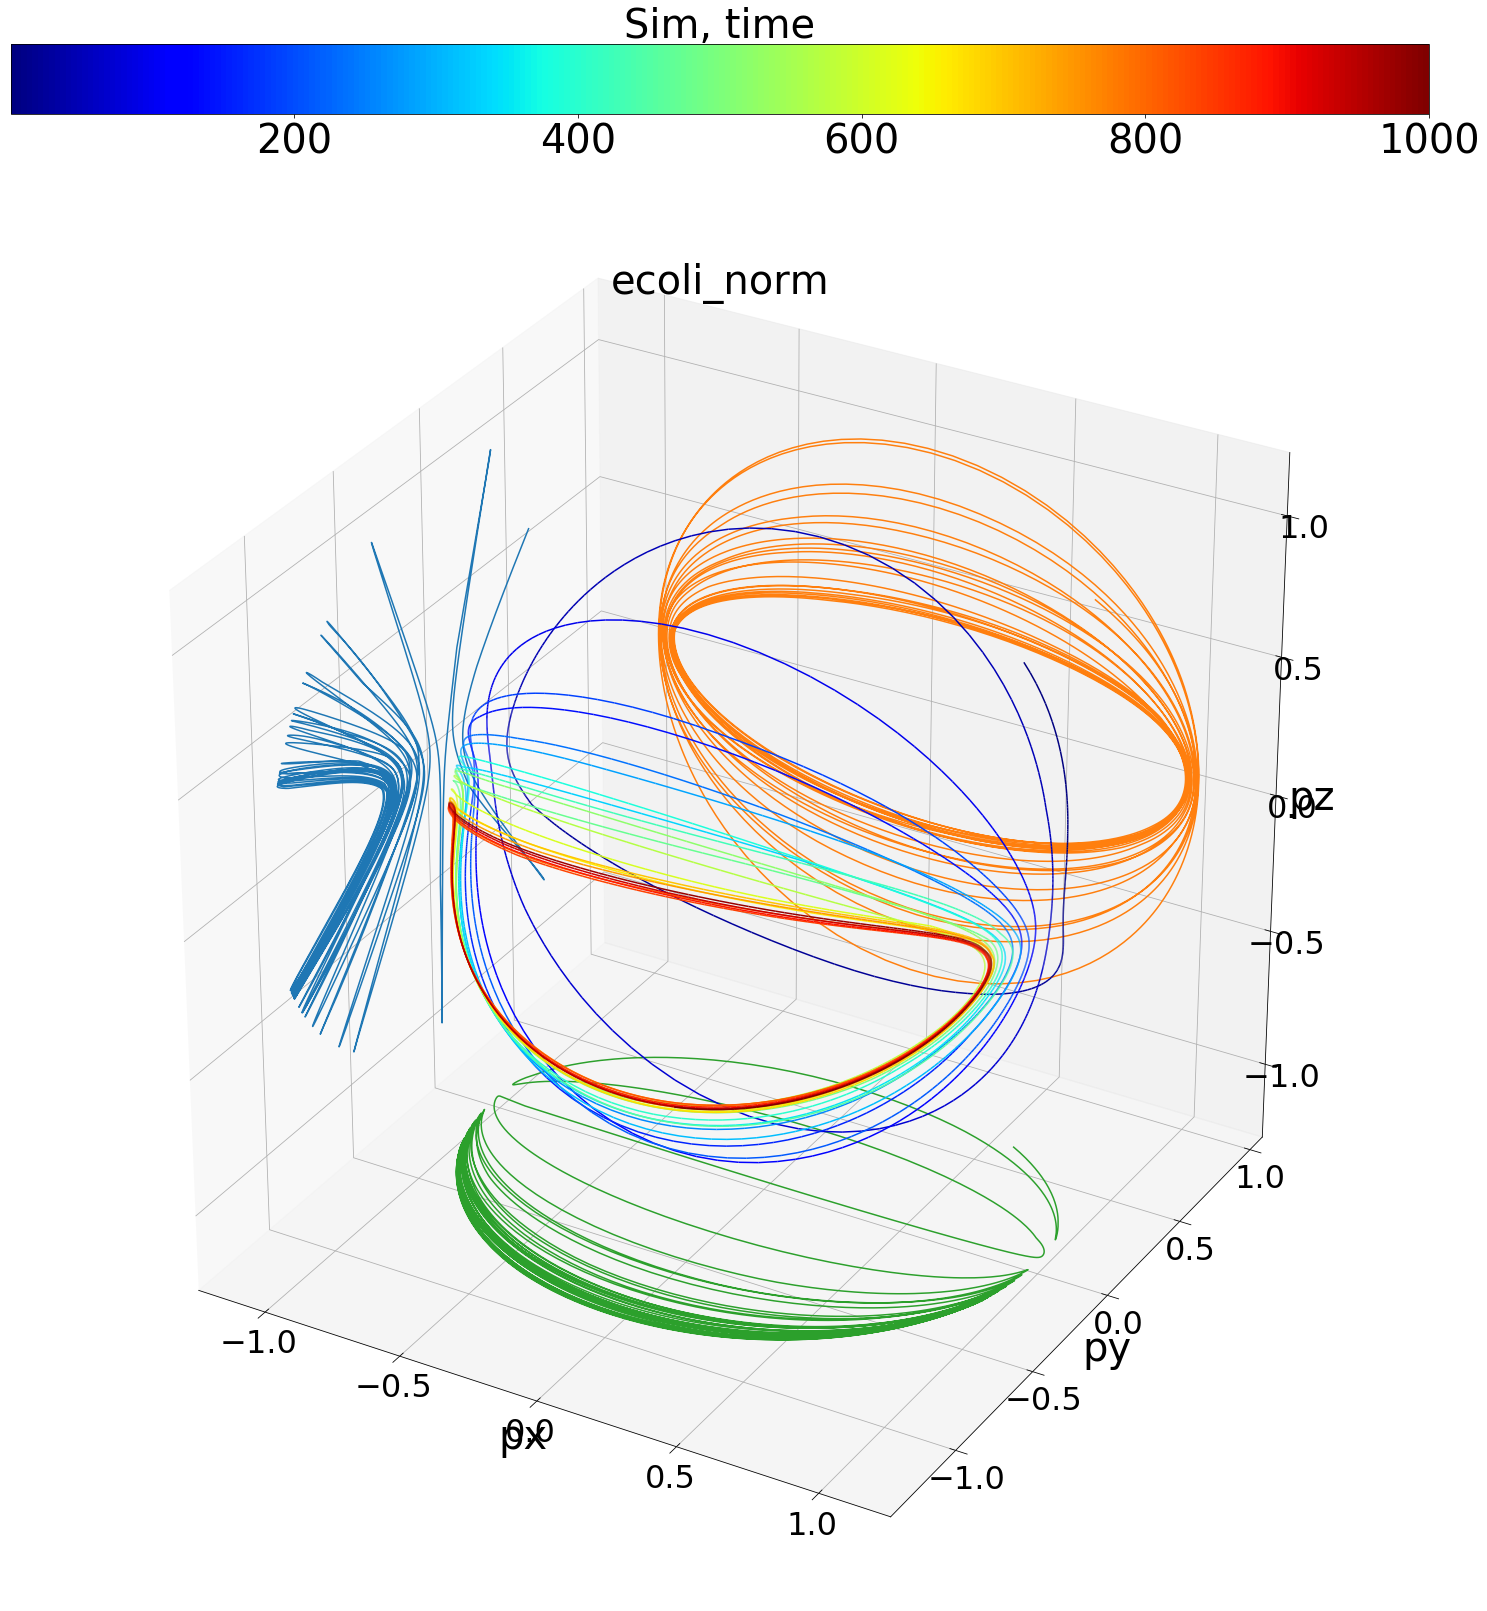

In [48]:
fig = plt.figure(figsize=(20, 20))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
ax0.set_title('ecoli_norm', size=fontsize)
cax0 = inset_axes(ax0, width="100%", height="5%", bbox_to_anchor=(0, 0.1, 1, 1),
               loc=1, bbox_transform=ax0.transAxes, borderpad=0,)
norm=plt.Normalize(Table_t.min(), Table_t.max())
cmap=plt.get_cmap('jet')
# Create the 3D-line collection object
points = Table_P.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = Line3DCollection(segments, cmap=cmap, norm=norm)
lc.set_array(Table_t) 
ax0.add_collection3d(lc, zs=points[:, :, 2].flatten(), zdir='z')
ax0.set_xlim(points[:, :, 0].min(), points[:, :, 0].max())
ax0.set_ylim(points[:, :, 1].min(), points[:, :, 1].max())
ax0.set_zlim(points[:, :, 2].min(), points[:, :, 2].max())
spf.set_axes_equal(ax0)
ax0.plot(np.ones_like(points[:, :, 0].flatten())*ax0.get_xlim()[0], points[:, :, 1].flatten(), points[:, :, 2].flatten())
ax0.plot(points[:, :, 0].flatten(), np.ones_like(points[:, :, 1].flatten())*ax0.get_ylim()[1], points[:, :, 2].flatten())
ax0.plot(points[:, :, 0].flatten(), points[:, :, 1].flatten(), np.ones_like(points[:, :, 2].flatten())*ax0.get_zlim()[0])
clb = fig.colorbar(lc, cax=cax0, orientation="horizontal")
clb.ax.tick_params(labelsize=fontsize)
clb.ax.set_title('Sim, time', size=fontsize)
plt.sca(ax0)
ax0.set_xlabel('px', size=fontsize)
ax0.set_ylabel('py', size=fontsize)
ax0.set_zlabel('pz', size=fontsize)
plt.xticks(fontsize=fontsize*0.8)
plt.yticks(fontsize=fontsize*0.8)
for t in ax0.zaxis.get_major_ticks(): t.label.set_fontsize(fontsize*0.8)
for spine in ax0.spines.values():
    spine.set_visible(False)
plt.tight_layout()
